In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 30

## 0.1 Generate demand forecast scenario

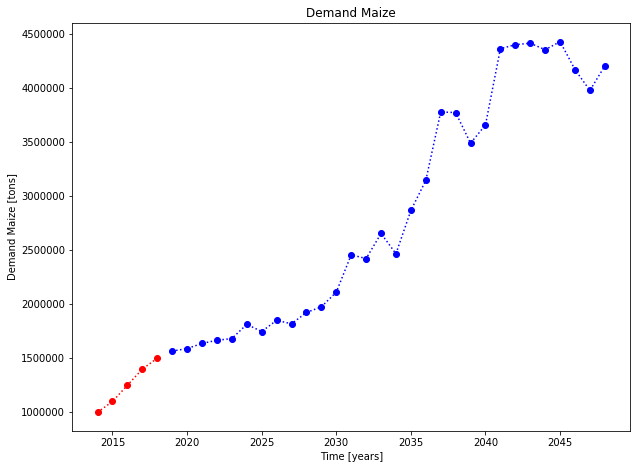

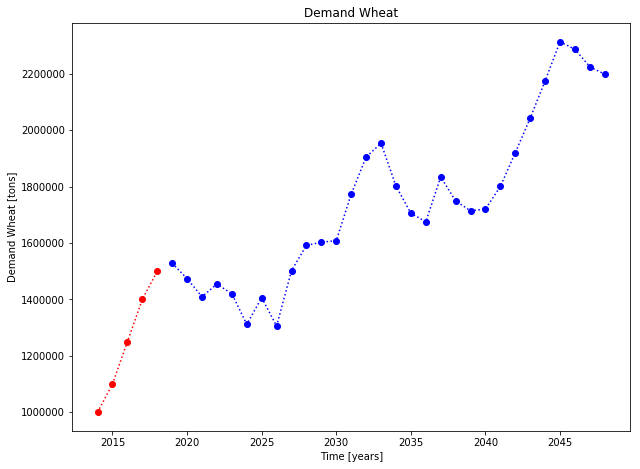

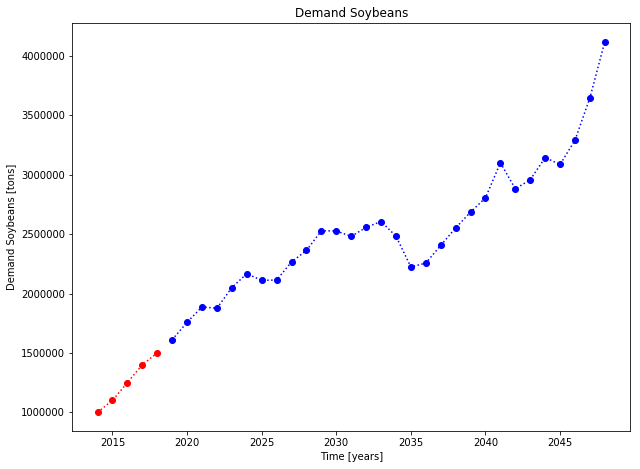

In [3]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = startyear, lifecycle = lifecycle)
wheat.scenario_random(startyear = startyear, lifecycle = lifecycle)
soybeans.scenario_random(startyear = startyear, lifecycle = lifecycle)

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

In [4]:
maize.handling_fee = 3
soybeans.handling_fee = 3
wheat.handling_fee = 3

## 0.2 Generate vessels

In [5]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [6]:
Terminal = system.System(startyear = startyear, lifecycle = lifecycle, elements = demand + vessels, debug=False,
                         crane_type_defaults=defaults.mobile_crane_data, storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [7]:
Terminal.simulate()

PV: [-7.24409600e+07 -1.53265321e+08  2.26431082e+06  2.90540349e+06
 -8.80047956e+06 -1.49640412e+07  2.35032343e+06  2.35707512e+06
 -2.64924200e+06 -9.07760842e+06 -1.39957093e+07 -2.58586562e+06
 -9.56556504e+06 -1.75289669e+07 -9.40305063e+06 -1.41452991e+07
  1.41467133e+06  2.14650116e+06 -2.70082412e+07 -2.89235186e+07
  1.46775816e+06  1.25300463e+06 -3.13840775e+07 -3.45008588e+07
 -5.05972743e+06 -1.06806450e+07 -1.47799051e+07  9.85112263e+05
 -3.60163591e+06 -2.41978695e+07]
NPV: -491414427.4086859


## Report all elements

In [8]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

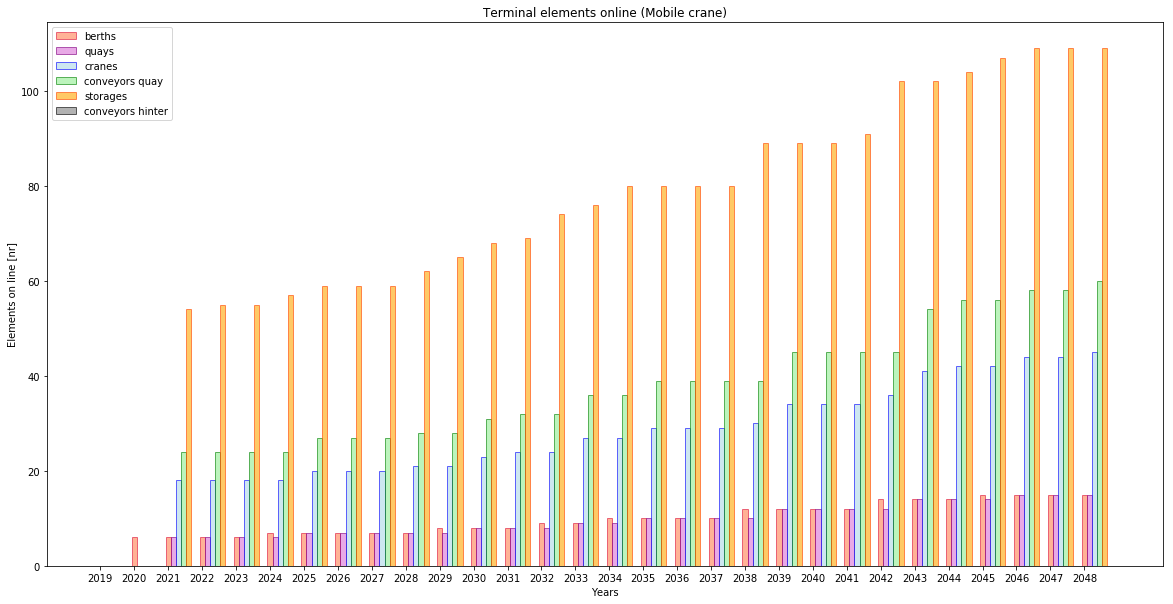

In [9]:
Terminal.terminal_elements_plot()

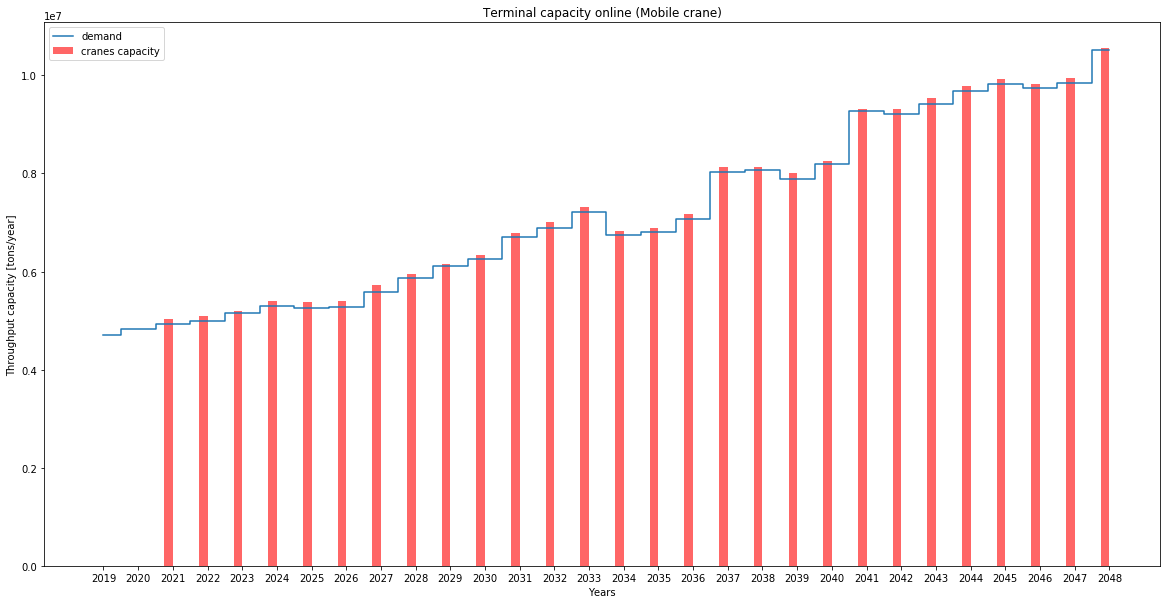

In [10]:
Terminal.terminal_capacity_plot()

In [12]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_nominal = Terminal.add_cashflow_elements()

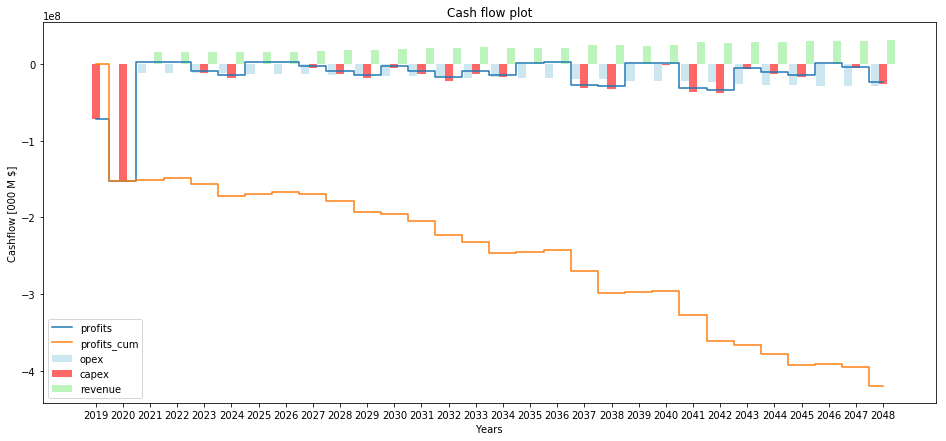

In [13]:
Terminal.cashflow_plot(cash_flows)

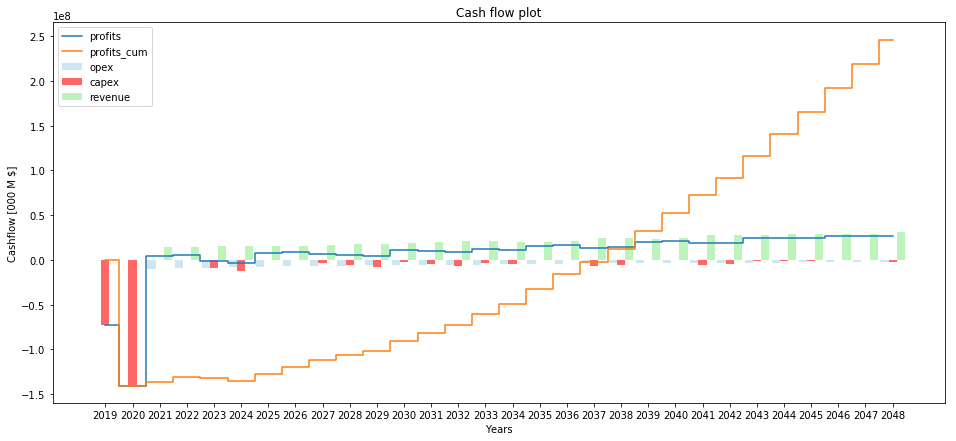

In [14]:
Terminal.cashflow_plot(cash_flows_WACC_nominal)

## SandBox

In [15]:
Terminal.NPV()

PV: [-7.24409600e+07 -1.53265321e+08  2.26431082e+06  2.90540349e+06
 -8.80047956e+06 -1.49640412e+07  2.35032343e+06  2.35707512e+06
 -2.64924200e+06 -9.07760842e+06 -1.39957093e+07 -2.58586562e+06
 -9.56556504e+06 -1.75289669e+07 -9.40305063e+06 -1.41452991e+07
  1.41467133e+06  2.14650116e+06 -2.70082412e+07 -2.89235186e+07
  1.46775816e+06  1.25300463e+06 -3.13840775e+07 -3.45008588e+07
 -5.05972743e+06 -1.06806450e+07 -1.47799051e+07  9.85112263e+05
 -3.60163591e+06 -2.41978695e+07]
NPV: -491414427.4086859
